# Custo de plano de saúde
- Péricles S. G. Marques
- https://www.linkedin.com/in/periclessavio/

### Objetivo:
Criar um modelo de regressão linear múltipla para prever os custos de plano de saúde

##### Carregar bibliotecas e dados

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
insurance = pd.read_csv('medical_insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Analidar os dados

In [67]:
print("O data set tem {} linhas e {} colunas".format(insurance.shape[0], insurance.shape[1]))

O data set tem 1338 linhas e 7 colunas


In [68]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [69]:
print("Checando se há dados nulos.")
insurance.isnull().sum()

Checando se há dados nulos.


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
print(insurance.dtypes)
print("\nAs variáveis 'sex', 'smoker' e 'region' são variáveis não numéricas.")

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As variáveis 'sex', 'smoker' e 'region' são variáveis não numéricas.


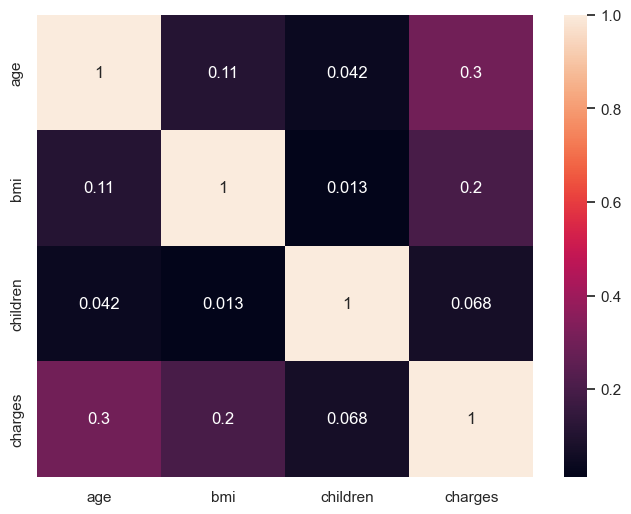

Verificando a correlação entre as variáveis quantitativas.


In [71]:
corr = insurance.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot= True)
plt.show()

print("Verificando a correlação entre as variáveis quantitativas.")

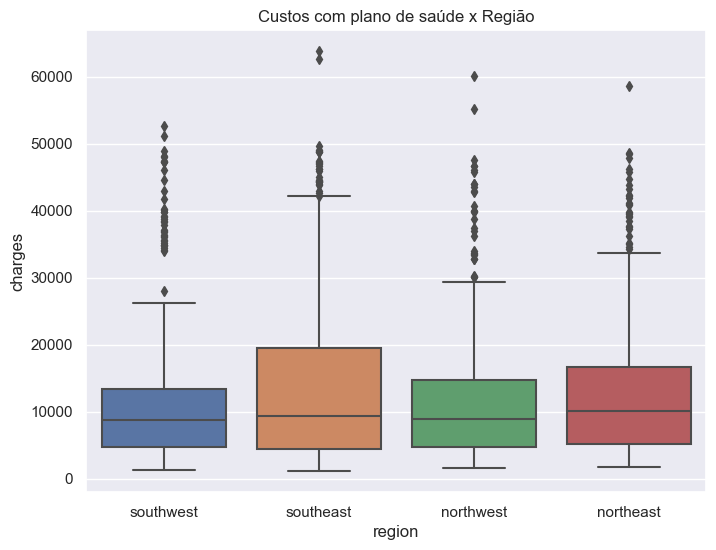

Não há diferenças significativas entre as regiões.


In [72]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=insurance).set(title='Custos com plano de saúde x Região')
plt.show()

print("Não há diferenças significativas entre as regiões.")

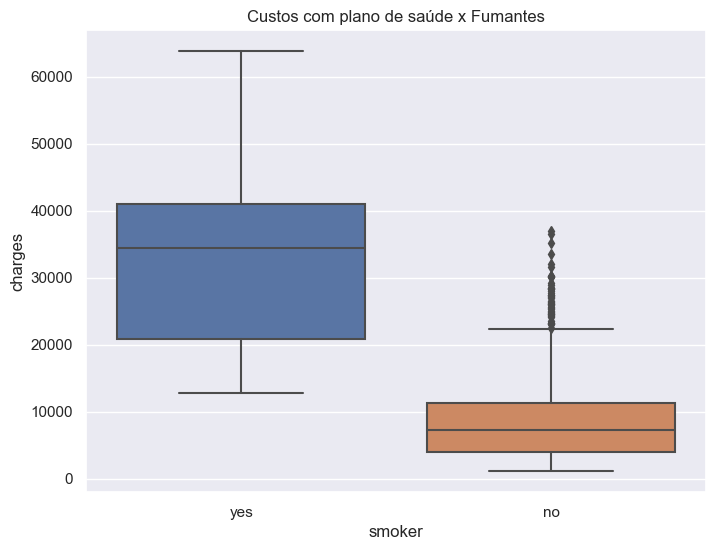

Pessoas que fumam gastam mais com o plano de saúde do que as que não fumam.


In [73]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance).set(title='Custos com plano de saúde x Fumantes')
plt.show()

print("Pessoas que fumam gastam mais com o plano de saúde do que as que não fumam.")

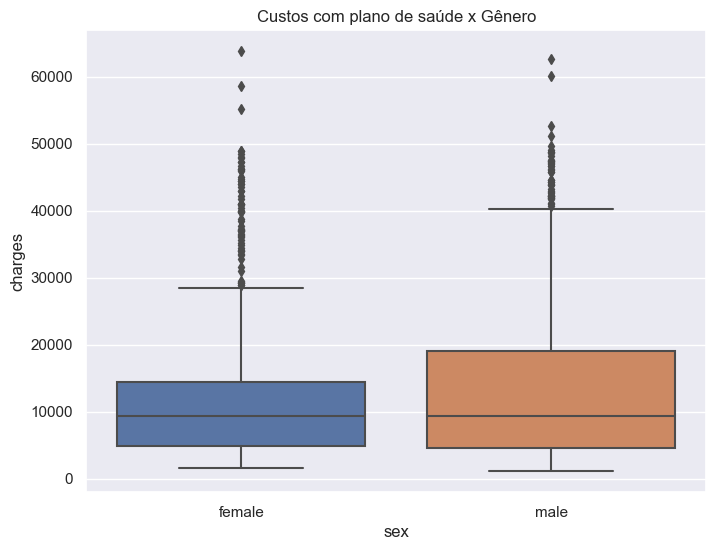

In [74]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=insurance).set(title='Custos com plano de saúde x Gênero')
plt.show()

Text(0.5, 1.0, 'Custos x Índice de massa corporal')

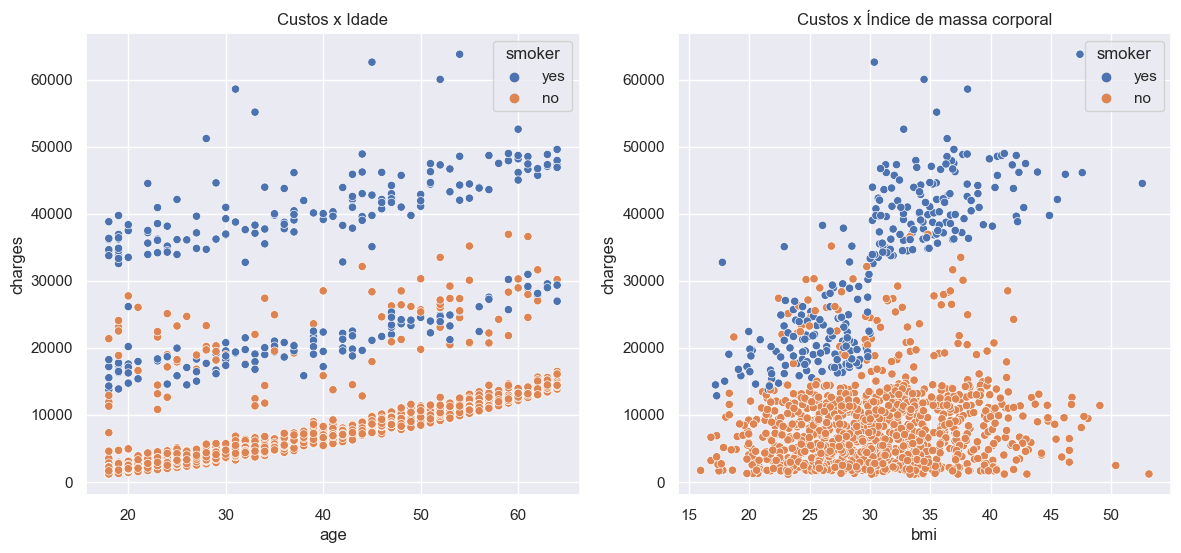

In [75]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=insurance, hue='smoker',ax=ax)
ax.set_title('Custos x Idade')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=insurance, hue='smoker')
ax.set_title('Custos x Índice de massa corporal')


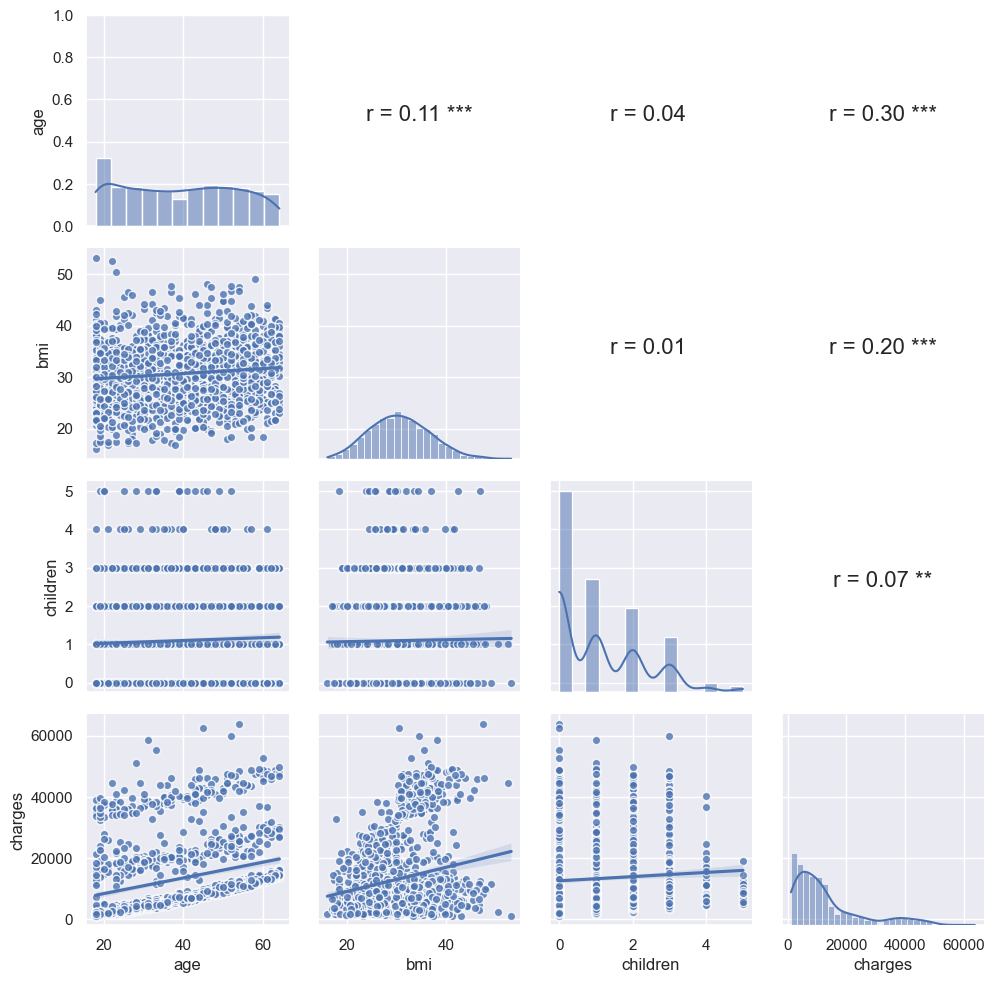

In [76]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None, **kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    if p < 0.01:
        sig_level = '***'
    elif p < 0.05:
        sig_level = '**'
    elif p < 0.05:
        sig_level = '*'
    else:
        sig_level = ''
        
    ax.annotate('r = {:.2f} {}'.format(r, sig_level), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.texts[0].set_size(16)
    ax.set_axis_off()

# Create the plot
g = sns.PairGrid(data=insurance, vars=["age", "bmi", "children", "charges"], hue=None)
g.map_upper(reg_coef)
g = g.map_lower(sns.regplot, scatter_kws={"edgecolor": "white"})
g = g.map_diag(sns.histplot, kde=True)
plt.show()

In [77]:
print("Transformar as variáveis categóricas em variáveis dummies\n")
# aplicar a função get_dummies() para criar as variáveis dummy
insurance_dummy = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])

# exibir o novo dataframe com as variáveis dummy
insurance_dummy

Transformar as variáveis categóricas em variáveis dummies



,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [78]:
insurance_dummy.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Verificar a correlação das variáveis (dummy).


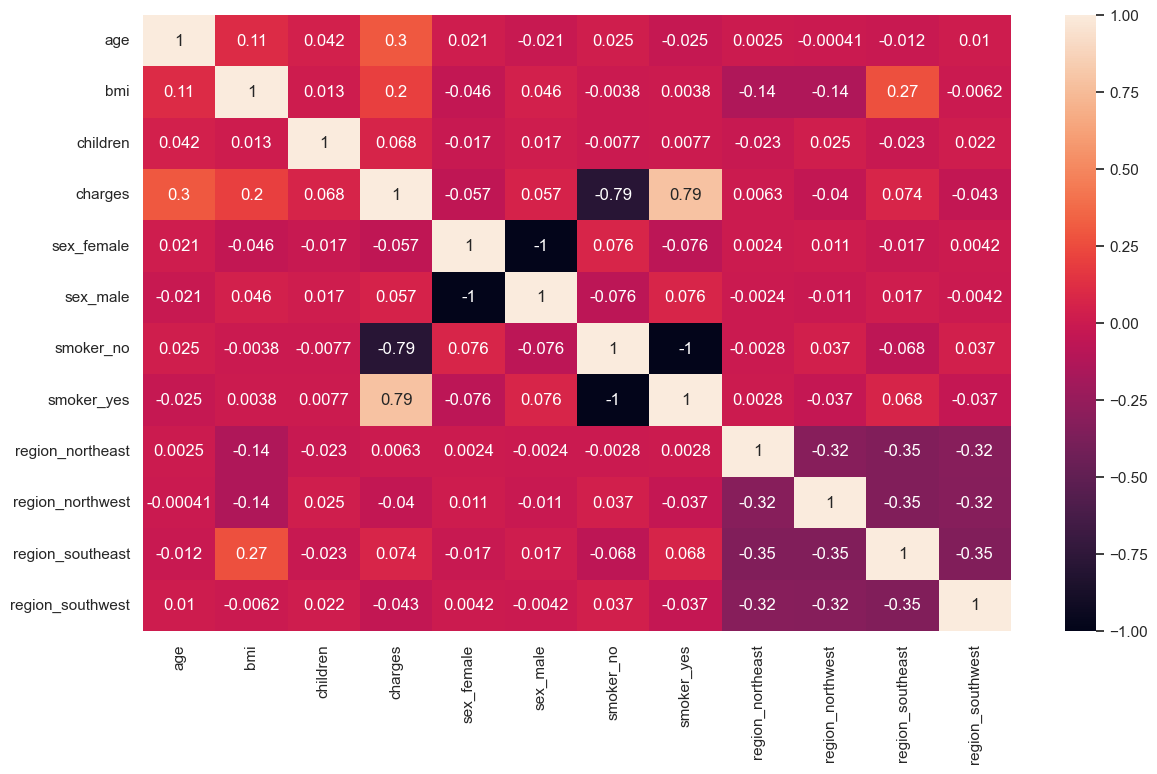

O custo do plano de saúde está fortemente relacionado com o hábito de fumar.


In [79]:
print("Verificar a correlação das variáveis (dummy).")
corr = insurance_dummy.corr()

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr, annot= True)
plt.show()

print("O custo do plano de saúde está fortemente relacionado com o hábito de fumar.")

In [80]:
print('Verificar a normalidade dos dados')

from scipy.stats import shapiro

# iterar pelas colunas do dataframe e aplicar o teste Shapiro-Wilk
for col in insurance_dummy.columns:
    stat, p = shapiro(insurance_dummy[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} segue uma distribuição normal (p = {p:.4f})')
    else:
        print(f'{col} não segue uma distribuição normal (p = {p:.4f})')

Verificar a normalidade dos dados
age não segue uma distribuição normal (p = 0.0000)
bmi não segue uma distribuição normal (p = 0.0000)
children não segue uma distribuição normal (p = 0.0000)
charges não segue uma distribuição normal (p = 0.0000)
sex_female não segue uma distribuição normal (p = 0.0000)
sex_male não segue uma distribuição normal (p = 0.0000)
smoker_no não segue uma distribuição normal (p = 0.0000)
smoker_yes não segue uma distribuição normal (p = 0.0000)
region_northeast não segue uma distribuição normal (p = 0.0000)
region_northwest não segue uma distribuição normal (p = 0.0000)
region_southeast não segue uma distribuição normal (p = 0.0000)
region_southwest não segue uma distribuição normal (p = 0.0000)


In [94]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(insurance_dummy['charges'],alpha=0.05)

insurance_dummy['charges'] = y_bc
ci,lam

((0.5610822870783847, 1.4226145739555494), 0.9908244735742645)

#### Modelo

In [ ]:
from sklearn.model_selection import train_test_split
X = insurance_dummy.drop('charges',axis=1) # Independet variable
y = insurance_dummy['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

# Referências
- https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial/notebook
- https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression
- https://www.kaggle.com/code/grosvenpaul/regression-eda-and-statistics-tutorial
- https://www.kaggle.com/code/ruslankl/health-care-cost-prediction-w-linear-regression

# WIP

In [93]:
insurance_dummy_boxcox = insurance_dummy

from scipy.stats import boxcox
# Aplicando a transformada de Box-Cox em todas as colunas do dataframe
for col in insurance_dummy_boxcox.columns:
    insurance_dummy_boxcox[col], _ = boxcox(insurance_dummy_boxcox[col]  +1)

insurance_dummy_boxcox

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,7.338024,6.690303,0.000000,10.830428,0.392005,0.000000,0.000000,0.006098,0.000000,0.000000,0.000000,0.011073
1,7.037051,7.532822,0.448814,7.988189,0.000000,0.457249,94.073925,0.000000,0.000000,0.000000,0.017001,0.000000
2,9.816506,7.427106,0.674104,9.140710,0.000000,0.457249,94.073925,0.000000,0.000000,0.000000,0.017001,0.000000
3,11.057649,5.860275,0.000000,11.174534,0.000000,0.457249,94.073925,0.000000,0.000000,0.011073,0.000000,0.000000
4,10.815633,6.837230,0.000000,8.967525,0.000000,0.457249,94.073925,0.000000,0.000000,0.011073,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,14.810653,7.141796,0.674104,10.231417,0.000000,0.457249,94.073925,0.000000,0.000000,0.011073,0.000000,0.000000
1334,7.037051,7.276543,0.000000,8.283389,0.392005,0.000000,94.073925,0.000000,0.010946,0.000000,0.000000,0.000000
1335,7.037051,7.943066,0.000000,7.919960,0.392005,0.000000,94.073925,0.000000,0.000000,0.000000,0.017001,0.000000
1336,7.922338,6.365758,0.000000,8.170046,0.392005,0.000000,94.073925,0.000000,0.000000,0.000000,0.000000,0.011073


In [ ]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(insurance_dummy['charges'],alpha=0.05)

insurance_dummy['charges'] = y_bc
ci,lam

In [86]:
for col in insurance_dummy_boxcox.columns:
    stat, p = shapiro(insurance_dummy_boxcox[col])
    alpha = 0.05
    if p > alpha:
        print(f'{col} segue uma distribuição normal (p = {p:.4f})')
    else:
        print(f'{col} não segue uma distribuição normal (p = {p:.4f})')

age não segue uma distribuição normal (p = 0.0000)
bmi segue uma distribuição normal (p = 0.3396)
children não segue uma distribuição normal (p = 0.0000)
charges não segue uma distribuição normal (p = 0.0000)
sex_female não segue uma distribuição normal (p = 0.0000)
sex_male não segue uma distribuição normal (p = 0.0000)
smoker_no não segue uma distribuição normal (p = 0.0000)
smoker_yes não segue uma distribuição normal (p = 0.0000)
region_northeast não segue uma distribuição normal (p = 0.0000)
region_northwest não segue uma distribuição normal (p = 0.0000)
region_southeast não segue uma distribuição normal (p = 0.0000)
region_southwest não segue uma distribuição normal (p = 0.0000)


In [87]:
import statsmodels.api as sm # biblioteca de modelagem estatística

# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_paises = sm.OLS.from_formula("charges ~ smoker_no + smoker_yes + age + bmi", insurance_dummy).fit()

#	children	charges	sex_female	sex_male		region_northeast	region_northwest	region_southeast	region_southwest

#Parâmetros do modelo
modelo_paises.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1351.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        17:46:26   Log-Likelihood:                -1170.9
No. Observations:                1338   AIC:                             2350.
Df Residuals:                    1334   BIC:                             2371.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1335      0.153     53.163      0.000       7.833       8.434
smoker_no     -0.1156      0.002    -46.514      0.000      -0.120      -0.111
smoker_yes     1.1983      0.023     53.205      0.000       1.154       1.242
age            0.1762      0.005     38.806      0.000       0.167       0.185
bmi            0.1019      0.018      5.684      0.000       0.067       0.137
==============================================================================
Omnibus:                      417.604   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1378.656
Skew:                           1.533   Prob(JB):                    4.25e-300
Kurtosis:                       6.916   Cond. No.                     5.99e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""